In [30]:
# ====================================================================
# ATIVIDADE SOMATIVA 1 - INTELIGÊNCIA ARTIFICIAL E BIG DATA
# ====================================================================

# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [31]:
# Configuração para melhor visualização dos gráficos
plt.style.use('default')
sns.set_palette("husl")

print("="*50)
print("ANÁLISE DE DADOS DE PRODUTOS ELETRÔNICOS")
print("Empresa: S&M Data Analytics")
print("="*50)

ANÁLISE DE DADOS DE PRODUTOS ELETRÔNICOS
Empresa: S&M Data Analytics


In [32]:
# ====================================================================
# 1. PREPARAÇÃO DOS DADOS - Importação do conjunto de dados
# ====================================================================
print("\n1. IMPORTANDO OS DADOS...")

# Caminho do arquivo csv
caminho_arquivo = 'C:/Users/dsadm/Desktop/Inteligencia_Artificial_e_Big-Data_2_semestre_ADS/Somativa_2/dados_produtos.csv'

try:
    df = pd.read_csv(caminho_arquivo)
    print("Dados importados com sucesso!")
    print(f"Total de registros: {len(df)}")
except:
    print("Erro ao carregar o arquivo. Verifique o caminho do arquivo CSV.")
    exit()


1. IMPORTANDO OS DADOS...
Dados importados com sucesso!
Total de registros: 100


In [33]:
# ====================================================================
# 2. EXPLORAÇÃO DOS DADOS
# ====================================================================

In [34]:
# Visualizando as primeiras linhas
print("\nPrimeiras linhas do dataset:")
print(df.head(10))


Primeiras linhas do dataset:
  product_name  rating  rating_count  purchased
0    Televisão    3.04            29          1
1      Celular    3.46          3872          0
2    Cafeteira    3.25          1187          0
3    Televisão    3.77          4097          1
4    Videogame    5.00          4738          1
5      Celular    3.98          1413          0
6         iPod    3.50          1907          0
7     Notebook    4.76          3857          0
8    Videogame    3.94          2800          1
9    Televisão    4.68          2600          0


In [35]:
# Informações do dataset
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None


In [36]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


In [37]:
# Verificando valores únicos
print("\nProdutos disponíveis:")
print(df['product_name'].unique())
print(f"Total de produtos diferentes: {df['product_name'].nunique()}")


Produtos disponíveis:
['Televisão' 'Celular' 'Cafeteira' 'Videogame' 'iPod' 'Notebook']
Total de produtos diferentes: 6


In [38]:
# Distribuição de compras
print("\nDistribuição de compras:")
print(df['purchased'].value_counts())
print(f"Taxa de compra: {df['purchased'].mean()*100:.2f}%")


Distribuição de compras:
purchased
1    55
0    45
Name: count, dtype: int64
Taxa de compra: 55.00%


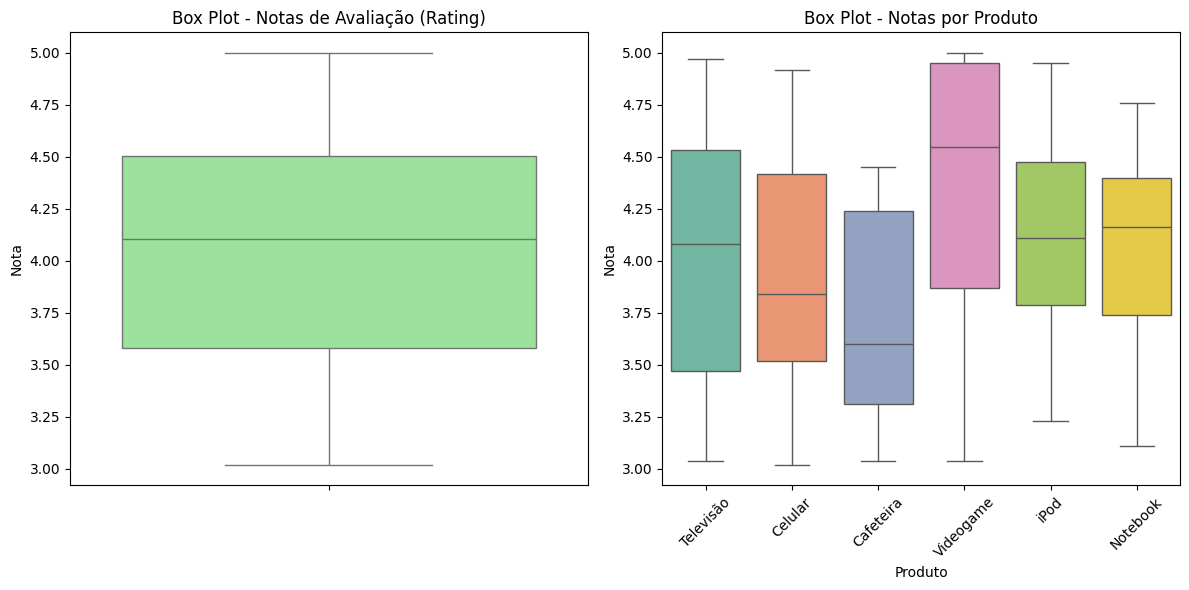

In [39]:
# Box plot das notas para verificar outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='rating', color='lightgreen')
plt.title('Box Plot - Notas de Avaliação (Rating)')
plt.ylabel('Nota')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='product_name', y='rating', hue='product_name', palette='Set2', legend=False)
plt.title('Box Plot - Notas por Produto')
plt.xlabel('Produto')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Análise por produto
print("\nAnálise por produto:")
for produto in df['product_name'].unique():
    df_produto = df[df['product_name'] == produto]
    taxa_compra = df_produto['purchased'].mean() * 100
    print(f"{produto}: {len(df_produto)} registros, Taxa de compra: {taxa_compra:.2f}%")


Análise por produto:
Televisão: 19 registros, Taxa de compra: 57.89%
Celular: 21 registros, Taxa de compra: 61.90%
Cafeteira: 9 registros, Taxa de compra: 33.33%
Videogame: 17 registros, Taxa de compra: 64.71%
iPod: 18 registros, Taxa de compra: 44.44%
Notebook: 16 registros, Taxa de compra: 56.25%


In [41]:
# ====================================================================
# 3. PRÉ-PROCESSAMENTO DOS DADOS
# ====================================================================
print("\n" + "="*50)
print("3. PRÉ-PROCESSAMENTO DOS DADOS")
print("="*50)

# Verificando valores ausentes
print("\nVerificando valores ausentes:")
print(df.isnull().sum())

# Tratando valores ausentes (se houver)
if df.isnull().sum().sum() > 0:
    print("\nValores ausentes encontrados! Tratando...")
    # Mediana
    df['rating'].fillna(df['rating'].median(), inplace=True)
    df['rating_count'].fillna(df['rating_count'].median(), inplace=True)
    print("alores ausentes tratados!")
else:
    print("Nenhum valor ausente encontrado!")

# Verificando duplicatas
print("\nVerificando dados duplicados:")
duplicatas = df.duplicated().sum()
print(f"Total de duplicatas: {duplicatas}")
if duplicatas > 0:
    df.drop_duplicates(inplace=True)
    print("✓ Duplicatas removidas!")

# Verificando se há dados após limpeza
print(f"\nTotal de registros após limpeza: {len(df)}")


3. PRÉ-PROCESSAMENTO DOS DADOS

Verificando valores ausentes:
product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64
Nenhum valor ausente encontrado!

Verificando dados duplicados:
Total de duplicatas: 0

Total de registros após limpeza: 100


In [42]:
# ====================================================================
# 4. CRIAÇÃO E TREINAMENTO DOS MODELOS POR PRODUTO
# ====================================================================
print("\n" + "="*50)
print("4. DIVISÃO DOS DADOS E TREINAMENTO DOS MODELOS")
print("="*50)

# Dicionários para armazenar modelos e resultados
modelos = {}
resultados = {}
X_test_dict = {}
y_test_dict = {}

# Lista de produtos
produtos = df['product_name'].unique()

# Para cada produto, criar e treinar um modelo
for produto in produtos:
    print(f"\n{'='*70}")
    print(f"PRODUTO: {produto.upper()}")
    print(f"{'='*70}")
    
    # Filtrar dados do produto
    df_produto = df[df['product_name'] == produto].copy()
    
    # Features (X) e Target (y)
    X = df_produto[['rating', 'rating_count']]
    y = df_produto['purchased']
    
    print(f"Total de exemplos: {len(X)}")
    print(f"Compras: {y.sum()} | Não compras: {len(y) - y.sum()}")


4. DIVISÃO DOS DADOS E TREINAMENTO DOS MODELOS

PRODUTO: TELEVISÃO
Total de exemplos: 19
Compras: 11 | Não compras: 8

PRODUTO: CELULAR
Total de exemplos: 21
Compras: 13 | Não compras: 8

PRODUTO: CAFETEIRA
Total de exemplos: 9
Compras: 3 | Não compras: 6

PRODUTO: VIDEOGAME
Total de exemplos: 17
Compras: 11 | Não compras: 6

PRODUTO: IPOD
Total de exemplos: 18
Compras: 8 | Não compras: 10

PRODUTO: NOTEBOOK
Total de exemplos: 16
Compras: 9 | Não compras: 7


In [43]:
# 4. Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dados de treino: {len(X_train)}")
print(f"Dados de teste: {len(X_test)}")

Dados de treino: 11
Dados de teste: 5


In [44]:
# 5 e 6. Criar e treinar modelo de Árvore de Decisão
print("\nTreinando modelo de Árvore de Decisão...")
modelo = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
modelo.fit(X_train, y_train)
print("Modelo treinado!")

# Armazenando modelo e dados de teste
modelos[produto] = modelo
X_test_dict[produto] = X_test
y_test_dict[produto] = y_test


Treinando modelo de Árvore de Decisão...
Modelo treinado!


In [45]:
# 7. Avaliação do modelo
print("\nAVALIAÇÃO DO MODELO:")
y_pred = modelo.predict(X_test)

# Métricas
acuracia = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Acurácia: {acuracia*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# Armazenar resultados
resultados[produto] = {
    'acuracia': acuracia,
    'recall': recall,
    'f1_score': f1,
    'matriz_confusao': cm
}


AVALIAÇÃO DO MODELO:
Acurácia: 40.00%
Recall: 33.33%
F1-Score: 40.00%

Matriz de Confusão:
[[1 1]
 [2 1]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.33      0.40         3

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



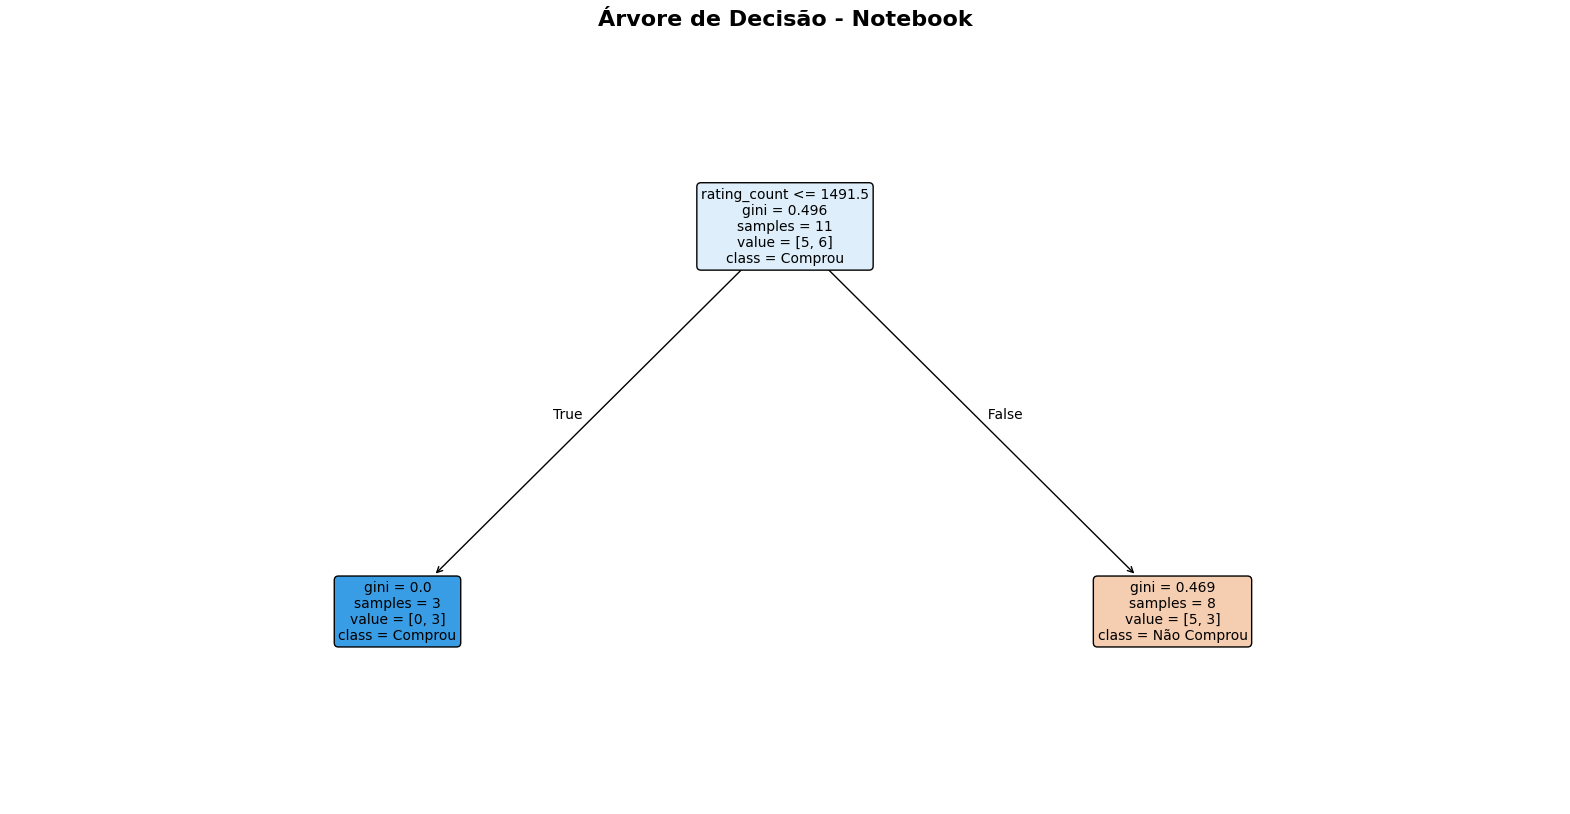

In [46]:
# 8. Visualização da Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(
    modelo,
    feature_names=['rating', 'rating_count'],
    class_names=['Não Comprou', 'Comprou'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(f'Árvore de Decisão - {produto}', fontsize=16, fontweight='bold')
plt.show()

In [47]:
# ====================================================================
# 9. CONCLUSÃO
# ====================================================================
print("\n" + "="*50)
print("9. CONCLUSÃO")
print("="*50)

print("\nApós realizar todas as etapas do projeto, podemos concluir que:")
print("\nOs modelos de Árvore de Decisão apresentaram resultados variados")
print("para prever as compras dos consumidores com base nas avaliações.")

print("\n" + "-"*70)
print("PRINCIPAIS OBSERVAÇÕES:")
print("-"*70)

# Calcular média geral de acurácia 
acuracias = [resultados[prod]['acuracia'] for prod in resultados.keys()]
media_acuracia = sum(acuracias) / len(acuracias)

print(f"\n1. ACURÁCIA MÉDIA DOS MODELOS: {media_acuracia*100:.2f}%")
print("Os modelos conseguem prever corretamente algumas compras,")
print("mas ainda cometem bastantes erros.")

print("\n2. LIMITAÇÃO DOS DADOS:")
print("Apenas 2 características usadas (rating e rating_count)")
print("Necessário incluir mais informações como:")
print(" * Preço do produto")
print(" * Categoria detalhada")
print(" * Histórico de compras do cliente")

print("\n3. DESBALANCEAMENTO DOS DADOS:")
for produto in produtos:
    qtd = len(df[df['product_name'] == produto])
    print(f"   → {produto}: {qtd} registros")

print("\n4. PRODUTOS COM MELHOR DESEMPENHO:")
# Produtos ordenados por acurácia
produtos_ordenados = sorted(resultados.items(), 
                            key=lambda x: x[1]['acuracia'], 
                            reverse=True)
for i, (produto, resultado) in enumerate(produtos_ordenados[:3], 1):
    print(f"   {i}º {produto}: {resultado['acuracia']*100:.2f}% de acurácia")

print("\n" + "-"*70)
print("CONCLUSÃO FINAL:")
print("-"*70)

print("\nOs modelos de Árvore de Decisão podem ser úteis como")
print("primeiro passo para entender o comportamento de compra.")

print("\nPorém, não são totalmente eficazes com o conjunto")
print("de dados atual.")

print("\n" + "-"*70)
print("SUGESTÕES DE MELHORIA:")
print("-"*70)
print("\n1. Coletar mais dados de diferentes produtos")
print("2. Adicionar mais características relevantes")
print("   (preço, promoções, descrição, etc.)")
print("3. Equilibrar melhor a quantidade de dados entre produtos")


9. CONCLUSÃO

Após realizar todas as etapas do projeto, podemos concluir que:

Os modelos de Árvore de Decisão apresentaram resultados variados
para prever as compras dos consumidores com base nas avaliações.

----------------------------------------------------------------------
PRINCIPAIS OBSERVAÇÕES:
----------------------------------------------------------------------

1. ACURÁCIA MÉDIA DOS MODELOS: 40.00%
Os modelos conseguem prever corretamente algumas compras,
mas ainda cometem bastantes erros.

2. LIMITAÇÃO DOS DADOS:
Apenas 2 características usadas (rating e rating_count)
Necessário incluir mais informações como:
 * Preço do produto
 * Categoria detalhada
 * Histórico de compras do cliente

3. DESBALANCEAMENTO DOS DADOS:
   → Televisão: 19 registros
   → Celular: 21 registros
   → Cafeteira: 9 registros
   → Videogame: 17 registros
   → iPod: 18 registros
   → Notebook: 16 registros

4. PRODUTOS COM MELHOR DESEMPENHO:
   1º Notebook: 40.00% de acurácia

---------------------